In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize
from skimage import data
from skimage.filters import sobel_h, sobel_v, gaussian
from skimage.feature import peak_local_max
from scipy.ndimage import convolve

# Section 1: Harris corner detector

(200, 200)


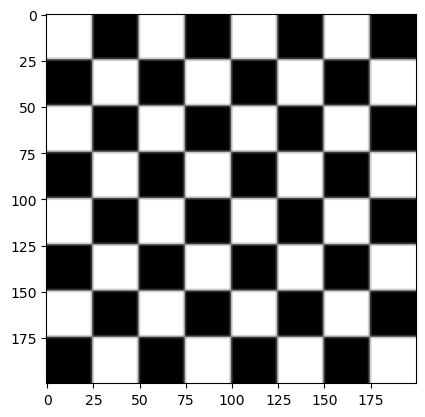

In [2]:
# Load one sample image
img = data.checkerboard()
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

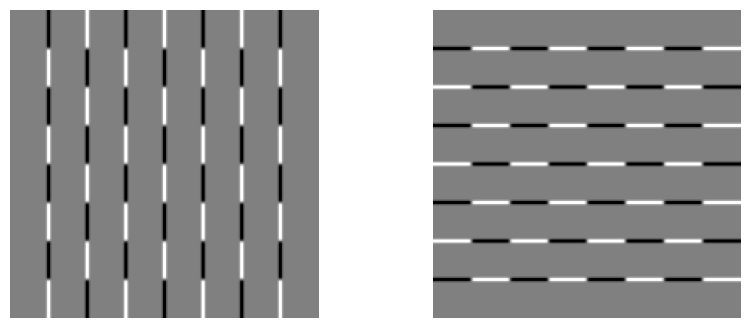

In [3]:
# Compute derivative in x and y direction
dy = sobel_h(img) # [1 0 -1]
dx = sobel_v(img) # [1 0 -1]^T

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(dx, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dy, cmap='gray')
plt.axis('off')
plt.show()

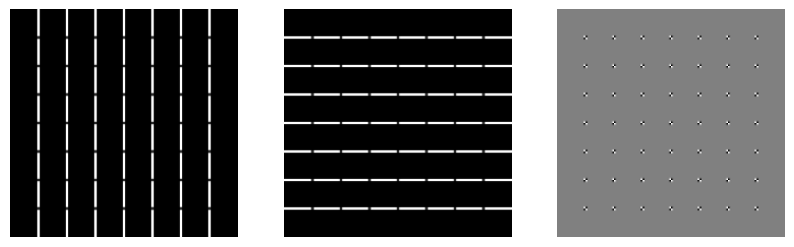

In [4]:
# Compute second-moment partial matrices
dx2 = dx**2
dy2 = dy**2
dxy = dx * dy

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(dx2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dy2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dxy, cmap='gray')
plt.axis('off')
plt.show()

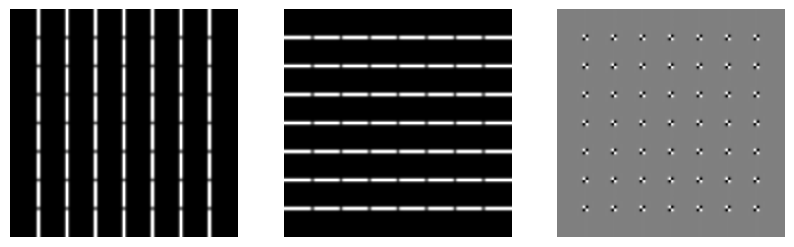

In [5]:
# Gaussian smoothing for numerical stability
dx2 = gaussian(dx2, sigma=1)
dy2 = gaussian(dy2, sigma=1)
dxy = gaussian(dxy, sigma=1)

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(dx2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dy2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dxy, cmap='gray')
plt.axis('off')
plt.show()

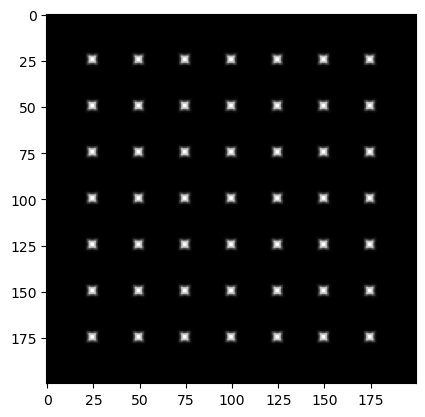

In [6]:
# Compute the M tensor-structure (4D representation) for each pixel, and then
# its corresponding R value (cornerness index)
R = np.zeros_like(img, dtype='float32')
for row in range(img.shape[0]):
  for col in range(img.shape[1]):
    M = np.array([[dx2[row, col], dxy[row, col]],
                  [dxy[row, col], dy2[row, col]]]).astype('float32')
    det = np.linalg.det(M)
    tra = np.trace(M)
    if (det != 0) and (tra != 0):
      R[row, col] = det / tra

# plot R
plt.imshow(R, cmap='gray')
plt.show()

(49, 2)


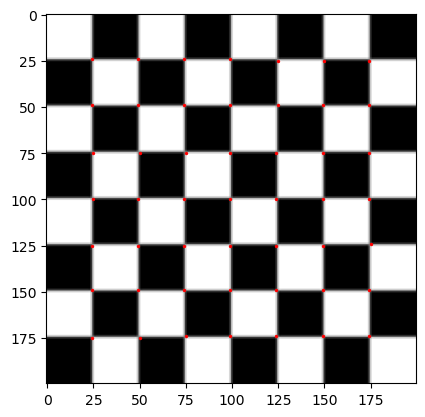

In [7]:
# Apply non local-maxima suppression
coord = peak_local_max(R, min_distance=10) # Note that output is in form (x, y)
print(coord.shape)

# Plot
plt.imshow(img, cmap='gray')
plt.scatter(coord[:, 1], coord[:, 0], s=2, c='r')
plt.show()

# Section 2: DoG

(303, 384)


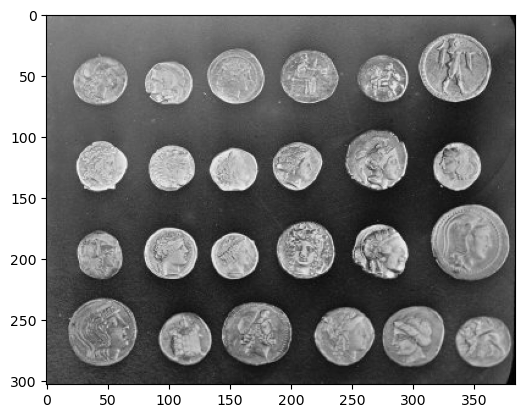

In [8]:
# Load one sample image
img = data.coins()
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

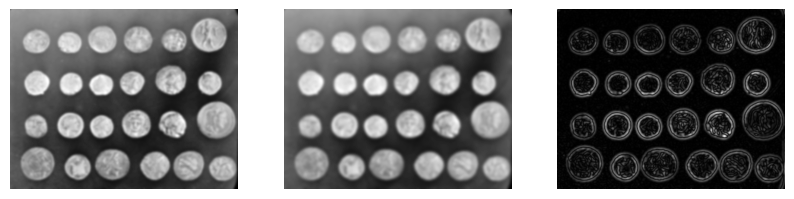

In [9]:
# Two consecutive Gaussian smoothing operations, then compute de DoG
img_gauss1 = gaussian(img, sigma=1.6)
img_gauss2 = gaussian(img_gauss1, sigma=1.6)
DoG = np.abs(img_gauss1 - img_gauss2)

# plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gauss1, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_gauss2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(DoG, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
# Use DoG from scikit image
from skimage.feature import blob_dog
blobs = blob_dog(img, max_sigma=30, threshold=.1)
print(blobs.shape)

# Normalize radius compensating for larger smoothing
blobs[:, 2] = blobs[:, 2] * np.sqrt(2.)

(374, 3)


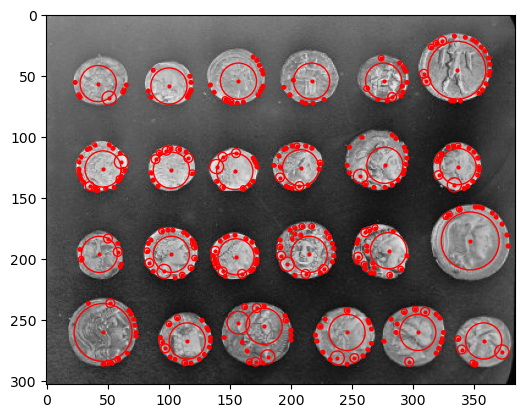

In [11]:
# Plot them
fig, ax = plt.subplots(1, 1)
ax.imshow(img, cmap='gray')
ax.scatter(blobs[:, 1], blobs[:, 0], s=4, c='r')
for blob in blobs:
  y, x, r = blob
  c = plt.Circle((x, y), r, color='r', linewidth=1, fill=False)
  ax.add_patch(c)
plt.show()

# Section 3: Mini-proyect -- ORB

In [12]:
# Usa las siguientes tres imagenes (cárgalas de disco) para este miniproyecto

In [13]:
# Image size
N_ROWS = 180
N_COLS = 320

In [14]:
# Load images
img1 = resize(imread("image_0001.jpg", as_gray=True), (N_ROWS, N_COLS))
img2 = resize(imread("image_0002.jpg", as_gray=True), (N_ROWS, N_COLS))
img3 = resize(imread("image_0003.jpg", as_gray=True), (N_ROWS, N_COLS))

print(img1.shape)
print(img2.shape)
print(img3.shape)

(180, 320)
(180, 320)
(180, 320)


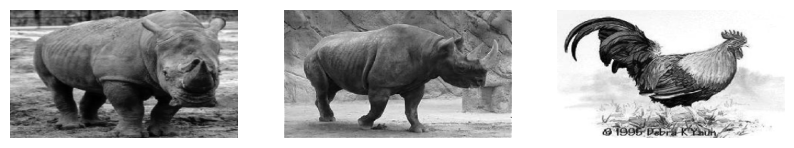

In [15]:
# Plot them
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# == Q1 ==
# En el detector de esquinas de Harris, ¿Qué efecto produce el cálculo de las
# matrices de segundo orden dxdx, dydy, dxdy (Por qué son relevantes en este
# método, qué significan físicamente en términos de magnitud de la luz)?

In [ ]:
# == Q2 ==
# ¿Qué sucede si no aplicamos suavizado Gaussiano a las matrices de segundo
# orden? i.e., 
# gdx2 = gaussian(dx2, sigma=1)
# gdy2 = gaussian(dy2, sigma=1)
# gdxy = gaussian(dxy, sigma=1)

In [ ]:
# == Q3 ==
# ¿Qué effecto tiene el valor del parámetro "min_distance" de la función
# peak_local_max?

In [ ]:
# == Q4 ==
# En la función "blob_dog", ¿qué impacto tiene cambiar los valores de los
# parámetros "max_sigma"  y "threshold"?

In [ ]:
# == Q5 ==
# Experimenta con varios valores de parámetros para la detección de blobs con
# DoG, y reporta la combinación que tenga mejor desempeño en las tres imágenes
# de este ejercicio, i.e., detecte la mayor cantidad de blobs, sin falsos positivos
# ni falsos negativos, en promedio en las tres imágenes.
# Justifica tu respuesta y muestra los blobs

In [ ]:
# == Q6 ==
# Investiga qué son el detector y descriptor ORB
# Haz un pequeño reporte de 1 a 2 páginas, explicando qué son y para qué sirven.
# Ref: skimage.feature.ORB
# Ref: https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf
# Ref: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb

In [ ]:
# == Q7 ==
# Usando la implementación de opencv o scikit-image, detecta y grafica los puntos
# ORB para las tres imágenes de este ejercicio.

In [ ]:
# == Q8 ==
# Compara el desempeño de Harris, DoG, y ORB en las tres imágenes de este ejercicio,
# ¿Cuál detector de PoI pareciera ser mejor? ¿En qué casos?